In [6]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
# Load the sample data from the CSV file into a pandas DataFrame
df = pd.read_csv("Test_Accuracy_Results_All_Dataset_50.csv")

In [8]:
# Create separate DataFrames for each dataset
df_cora = df[df["dataset"] == "cora"]
df_citeseer = df[df["dataset"] == "citeseer"]
df_pubmed = df[df["dataset"] == "pubmed"]

In [9]:
# Set the bin size for the histograms
bin_size = 0.05

(array([150.]), array([0.754, 0.821]), <BarContainer object of 1 artists>)

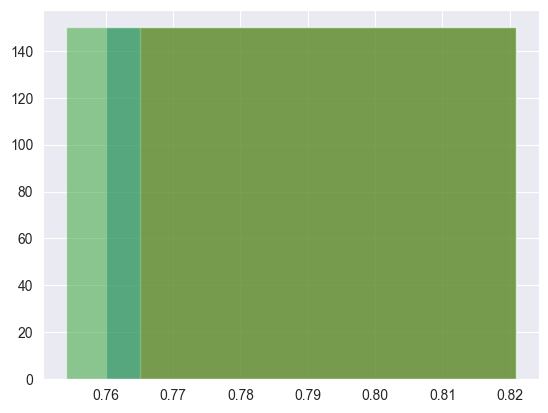

In [10]:
# Plot the histograms for each dataset
plt.hist(df_cora["accuracy"], bins = int((max(df_cora["accuracy"]) - min(df_cora["accuracy"])) / bin_size), alpha = 0.5, label = "cora")
plt.hist(df_citeseer["accuracy"], bins = int((max(df_citeseer["accuracy"]) - min(df_citeseer["accuracy"])) / bin_size), alpha = 0.5, label = "citeseer")
plt.hist(df_pubmed["accuracy"], bins = int((max(df_pubmed["accuracy"]) - min(df_pubmed["accuracy"])) / bin_size), alpha = 0.5, label = "pubmed")


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


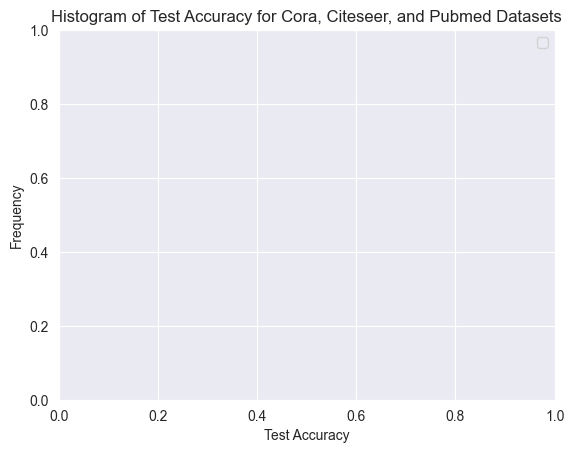

In [11]:
# Add labels and legend to the plot
plt.xlabel("Test Accuracy")
plt.ylabel("Frequency")
plt.title("Histogram of Test Accuracy for Cora, Citeseer, and Pubmed Datasets")
plt.legend(loc='upper right')

In [12]:
# Display the plot
plt.show()

TBU


In [13]:
import pandas as pd
import graphviz as gv

# Load the sample data from the CSV file into a pandas DataFrame
df = pd.read_csv("Test_Accuracy_Results_All_Dataset_50.csv")

# Create a Graphviz graph
graph = gv.Digraph(format='png')

# Add nodes for each dataset
graph.node('cora')
graph.node('citeseer')
graph.node('pubmed')

# Iterate over each row in the DataFrame and add edges to the graph
for index, row in df.iterrows():
    if row['dataset'] == 'cora':
        graph.edge('cora', str(row['accuracy']))
    elif row['dataset'] == 'citeseer':
        graph.edge('citeseer', str(row['accuracy']))
    elif row['dataset'] == 'pubmed':
        graph.edge('pubmed', str(row['accuracy']))

# Render and save the graph as a PNG image
graph.render('dot_graph')

'dot_graph.png'

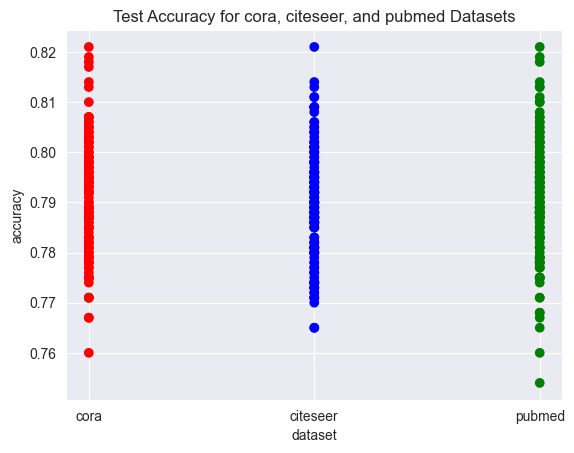

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the sample data from the CSV file into a pandas DataFrame
df = pd.read_csv("Test_Accuracy_Results_All_Dataset_50.csv")

# Create a dictionary to map dataset names to colors
colors = {"cora": "red", "citeseer": "blue", "pubmed": "green"}

# Create a scatter plot of the test accuracy values, with each dataset represented by a different color
plt.scatter(df["dataset"], df["accuracy"], c=df["dataset"].map(colors))

# Add a title and labels for the x- and y-axes
plt.title("Test Accuracy for cora, citeseer, and pubmed Datasets")
plt.xlabel("dataset")
plt.ylabel("accuracy")

# Display the plot
plt.show()

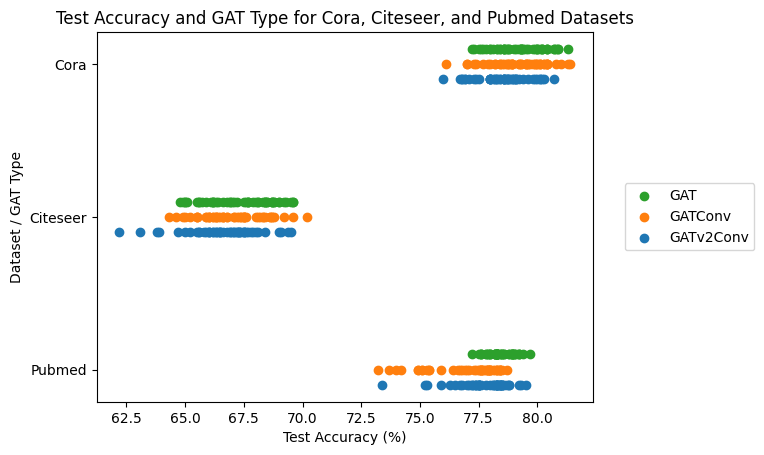

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt_colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

# Load the sample data from the CSV file into a pandas DataFrame
df = pd.read_csv("Test_Accuracy_Results_All_Dataset_50_v02.csv")

# Define numerical values for each dataset
dataset_ids = {"Citeseer": 2, "Cora": 3, "Pubmed": 1}

gat_colors = {"GATv2Conv": plt_colors[0], "GATConv": plt_colors[1], "GAT": plt_colors[2]}

# Create a list to hold the handles for the legend
handles = []

# Create a scatter plot of the test accuracy values, with each dataset, GAT type, and GAT type index represented by a different color, marker, and y-value
for i, dataset in enumerate(df["dataset"].unique()):
    for gat_type_idx, gat_type in enumerate(df[df["dataset"] == dataset]["gat_type"].unique()):
        data = df[(df["dataset"] == dataset) & (df["gat_type"] == gat_type)]
        kwargs = {}
        if i == 0:
            kwargs['label'] = gat_type
        # print(dataset, gat_type, [(f(data["accuracy"]), name) for f, name in [(np.mean, "mean"), (np.std, "stddev"), (np.min, "min"), (np.max, "max")]])
        plt.scatter(data["accuracy"] * 100, [dataset_ids[dataset] + gat_type_idx/10] * len(data),
                    c=gat_colors[gat_type], **kwargs)

# # Create a scatter plot of the test accuracy values, with each dataset and GAT type represented by a different color, marker, and y-value
# for dataset in df["dataset"].unique():
#     for gat_type in df[df["dataset"] == dataset]["gat_type"].unique():
#         data = df[(df["dataset"] == dataset) & (df["gat_type"] == gat_type)]
#         handle = plt.scatter(data["accuracy"], [dataset_ids[dataset] + 0.1] * len(data), c=gat_colors[gat_type],
#                              marker=markers[gat_type], label=gat_type if (dataset == df["dataset"].unique()[0] and gat_type == df[df["dataset"] == dataset]["gat_type"].unique()[0]) else "")
#         if handle.get_label() not in [h.get_label() for h in handles]:
#             handles.append(handle)



# Add y-ticks to show the dataset names and GAT types
yticks = []
yticklabels = []
for dataset in df["dataset"].unique():
    yticks.append(dataset_ids[dataset] + 0.1)
    yticklabels.append(dataset)
#     for gat_type in df[df["dataset"] == dataset]["gat_type"].unique():
#         yticks.append(dataset_ids[dataset])
#         yticklabels.append('')
plt.yticks(yticks, yticklabels)

# Create a list to hold the handles for the legend
handles = []

# Add a custom legend, title, and labels for the x- and y-axes
# Add a custom legend, title, and labels for the x- and y-axes
handles, labels = plt.gca().get_legend_handles_labels()
order = [2, 1, 0]
plt.legend([handles[idx] for idx in order], [labels[idx] for idx in order], loc='center left', bbox_to_anchor=(1.05, 0.5))

# plt.legend(loc='center left', bbox_to_anchor=(1.05, 0.5))
plt.title("Test Accuracy and GAT Type for Cora, Citeseer, and Pubmed Datasets")
plt.xlabel("Test Accuracy (%)")
plt.ylabel("Dataset / GAT Type")


# Display the plot
plt.show()
# plt.savefig('results.png')